In [1]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


# Importing Packages

In [2]:
import os
import numpy as np
import shutil
import matplotlib.pyplot as plt
import albumentations as A
from glob import glob
from PIL import Image
from pathlib import Path

import albumentations as A

from tqdm import tqdm

import cv2

## Creating Train and Validation Datasets

In [22]:
# Define directory
root_dir = 'data/Tuberculosis/original'
output_dir = 'data/Tuberculosis/augmented_sorted'

# # Create directories for training, validation sets.
# for folder in ['train', 'val']:
#     for cls in ['Non-TB', 'TB']:
#         os.makedirs(os.path.join(output_dir, folder, cls))

# Creating partitions of the data after shuffling.
current_cls = 'Non-TB'
src = os.path.join(root_dir, current_cls)
all_file_names_0 = os.listdir(src)
np.random.shuffle(all_file_names_0)
train_file_names_0, val_file_names_0 = np.split(np.array(all_file_names_0), [int(len(all_file_names_0) * 0.8)])
train_file_names_0 = [os.path.join(src, name) for name in train_file_names_0.tolist()]
val_file_names_0 = [os.path.join(src, name) for name in val_file_names_0.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

# Move to the next class
current_cls = 'TB'
src = os.path.join(root_dir, current_cls)  # Folder to copy images from.
all_file_names_1 = os.listdir(src)
np.random.shuffle(all_file_names_1)
train_file_names_1, val_file_names_1 = np.split(np.array(all_file_names_1), [int(len(all_file_names_1) * 0.8)])
train_file_names_1 = [os.path.join(src, name) for name in train_file_names_1.tolist()]
val_file_names_1 = [os.path.join(src, name) for name in val_file_names_1.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

all_file_names = all_file_names_0 + all_file_names_1
train_file_names = train_file_names_0 + train_file_names_1
val_file_names = val_file_names_0 + val_file_names_1

print('Total images: ', len(all_file_names))
print('Training: ', len(train_file_names))
print('Validation: ', len(val_file_names))

100%|██████████| 936/936 [00:01<00:00, 496.44it/s]

Total images:  12278
Training:  9822
Validation:  2456


## Creating augmented dataset

In [14]:
root_dir = 'data/TB copy/original/TB'

In [15]:
full_paths = glob('data/TB copy/original/TB/*.png')
filenames = os.listdir('data/TB copy/original/TB')

100%|██████████| 2339/2339 [14:18<00:00,  2.72it/s] 


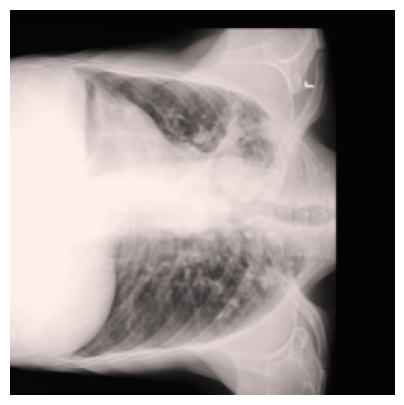

In [18]:
# defining augmentation pipeline
transform = A.Compose([
    A.Transpose(p=0.5),
    A.VerticalFlip(p=0.5),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.RandomContrast(limit=0.3, p=0.5),
    A.OneOf([
        A.MotionBlur(blur_limit=5),
        A.MedianBlur(blur_limit=5),
        A.GaussNoise(var_limit=(5.0, 30.0)),
    ], p=0.3),
    A.OneOf([
        A.OpticalDistortion(distort_limit=1.0),
        A.GridDistortion(num_steps=5, distort_limit=1.0),
        A.ElasticTransform(alpha=3),
    ], p=0.3),
    A.CLAHE(clip_limit=4.0, p=0.3),
    A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.3),
    A.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.2, rotate_limit=30, border_mode=0, p=0.4),
    A.Resize(256, 256)
])

full_paths = glob('data/TB copy/original/TB/*.png')
filenames = os.listdir('data/TB copy/original/TB')

def visualize(image):
    plt.figure(figsize=(5, 5))
    plt.axis('off')
    plt.imshow(image)

image = cv2.imread(full_paths[0])
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
transformed = transform(image=image)
aug_img = transformed['image']
aug_img = cv2.resize(aug_img, (255, 255))
visualize(aug_img)

for i in tqdm(range(0, len(full_paths))):
    image = cv2.imread(full_paths[i], cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed = transform(image=image)
    aug_img = transformed['image']
    aug_img = cv2.resize(aug_img, (255, 255))
    cv2.imwrite(os.path.join(root_dir, f"Augmentations/aug_{filenames[i][:-3]}.png"), aug_img)

In [6]:
# Define directory
root_dir = '/drive/MyDrive/Datasets/Omdena Myanmar/tuberculosis-detection-model/augmented'
output_dir = '/drive/MyDrive/Datasets/Omdena Myanmar/tuberculosis-detection-model/augmented/output'

# Create directories for training, validation sets.
for folder in ['train', 'val']:
    for cls in ['Non-Tuberculosis', 'Tuberculosis']:
        os.makedirs(os.path.join(output_dir, folder, cls))

# Creating partitions of the data after shuffling.
current_cls = 'Non-Tuberculosis'
src = os.path.join(root_dir, current_cls)
all_file_names_0 = os.listdir(src)
np.random.shuffle(all_file_names_0)
train_file_names_0, val_file_names_0 = np.split(np.array(all_file_names_0), [int(len(all_file_names_0) * 0.8)])
train_file_names_0 = [os.path.join(src, name) for name in train_file_names_0.tolist()]
val_file_names_0 = [os.path.join(src, name) for name in val_file_names_0.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_0):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

# Move to the next class
current_cls_1 = 'Tuberculosis'
src_1 = os.path.join(root_dir, current_cls_1)  # Folder to copy images from.
tb_file_names = ['Tuberculosis/' + str(x) for x in os.listdir(src_1)]

current_cls_2 = 'Augmented TB'
src_2 = os.path.join(root_dir, current_cls_2)  # Folder to copy images from.
aug_tb_file_names = ['Augmented TB/' + str(x) for x in os.listdir(src_2)]

all_file_names_1 = tb_file_names + aug_tb_file_names
np.random.shuffle(all_file_names_1)
train_file_names_1, val_file_names_1 = np.split(np.array(all_file_names_1), [int(len(all_file_names_1) * 0.8)])
train_file_names_1 = [os.path.join(root_dir, name) for name in train_file_names_1.tolist()]
val_file_names_1 = [os.path.join(root_dir, name) for name in val_file_names_1.tolist()]

# Move the images to the corresponding folders in the output directory.
for file_name in tqdm(train_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'train', current_cls))

for file_name in tqdm(val_file_names_1):
    shutil.copy(file_name, os.path.join(output_dir, 'val', current_cls))

all_file_names = all_file_names_0 + all_file_names_1
train_file_names = train_file_names_0 + train_file_names_1
val_file_names = val_file_names_0 + val_file_names_1

print('Total images: ', len(all_file_names))
print('Training: ', len(train_file_names))
print('Validation: ', len(val_file_names))

100%|██████████| 931/931 [00:29<00:00, 31.23it/s]

Total images:  12213
Training:  9770
Validation:  2443
